In [91]:
import matplotlib.pyplot as plt
import numpy as np

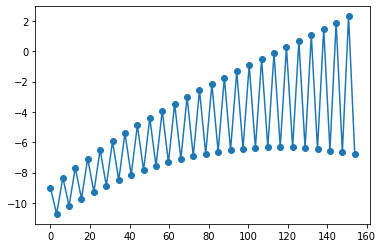

In [92]:
#Generation of oscillating sequence 
n = 50
x = np.arange(n) *np.pi
y = np.cos(x) * np.exp(x/100) - 10*np.exp(-0.01*x)

plt.figure()
plt.plot(x, y, 'o-')
plt.show()

#### Exponentially weighted average

In [93]:
def ewa(y, beta):
    
    n = len(y)
    
    ewa_seq = np.zeros(n)
    ewa_seq[0] = (1-beta)*y[0] # + beta*0.
    
    for i in range(1,n):
        ewa_seq[i] = beta*ewa_seq[i-1] + (1-beta)*y[i]
    
    return ewa_seq

#### Exponentially weighted average with bias correction

In [94]:
def ewabc(y, beta):
    
    n = len(y)
    zs = y
    z = 0

    for i in range(n):
        z = beta*z + (1-beta)*y[i]
        zc = z/(1 - beta**(i+1))
        zs[i] = zc
    return zs

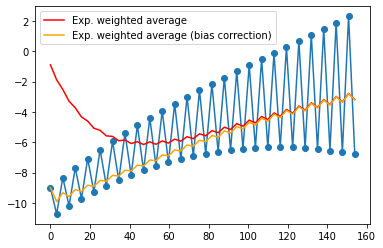

In [95]:
# ejemplo:

beta = 0.9

plt.figure()
plt.plot(x, y, 'o-')
plt.plot(x, ewa(y, beta), c='red', label='Exp. weighted average')
plt.plot(x, ewabc(y, beta), c='orange', label='Exp. weighted average (bias correction)')
plt.legend()
plt.savefig('aa.jpg')
plt.show()


In [96]:
#We define the x^2 function to examplify

def f(x):
    return x**2

def grad(x):
    return 2*x

#Classic gradient descent
def gd(x, grad, alpha, max_iter=10):
    
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    
    for i in range(max_iter):
        x = x - alpha*grad(x)
        xs[i+1] = x

    return xs

#Gradient descent with momentum
def gd_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x

    v=0

    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1 + beta**(i+1))
        x = x - alpha*vc
        xs[i+1] = x
    return xs

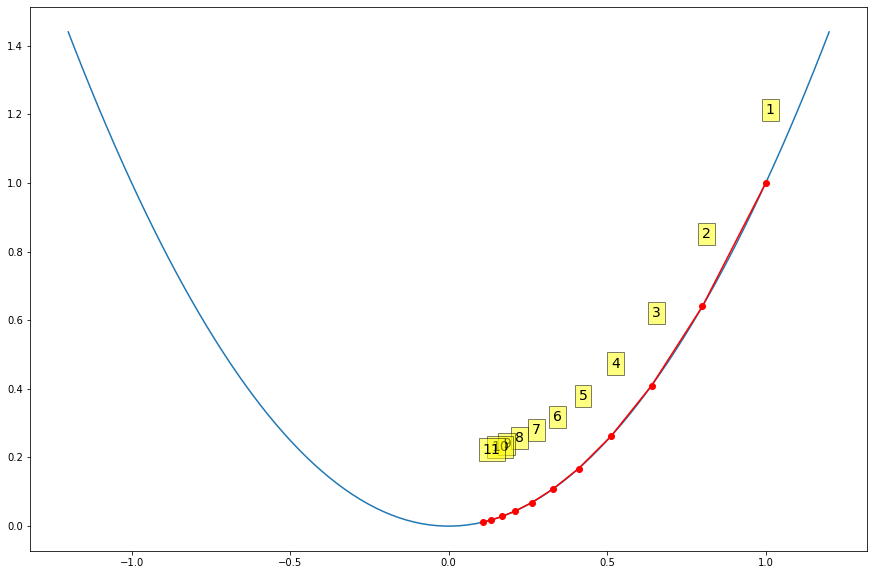

In [97]:
#Gradient descent with moderate step size
alpha = 0.1
x0 = 1
xs = gd(x0, grad, alpha)

xp = np.linspace(-1.2, 1.2, 100)
plt.figure(figsize=(15,10))
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')

for i, (x,y) in enumerate(zip(xs, f(xs)), 1):
    plt.text(x, y+0.2, i, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)

plt.show()

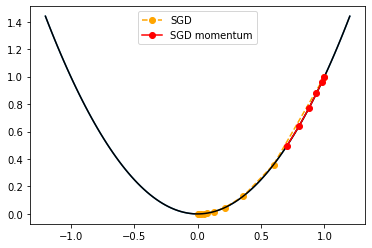

In [98]:
#Gradient descent with large step size
alpha = 0.2
x0 = 1
xs = gd(x0, grad, alpha)

xp = np.linspace(-1.2, 1.2, 100)
plt.figure()
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o--', c='orange', label='SGD')

#for i, (x,y) in enumerate(zip(xs, f(xs)), 1):
    #plt.text(x*1.2, y, i, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
#plt.show()

#Gradient descent with momentum
#alpha = 0.95
x0 = 1
xs = gd_momentum(x0, grad, alpha, beta=0.9, max_iter=5)

xp = np.linspace(-1.2, 1.2, 100)
#plt.figure()
plt.plot(xp, f(xp), c='black')
plt.plot(xs, f(xs), 'o-', c='red', label='SGD momentum')
plt.legend()

#for i, (x,y) in enumerate(zip(xs, f(xs)), 1):
    #plt.text(x, y+0.2, i, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
plt.savefig('asdasd.jpg')
plt.show()

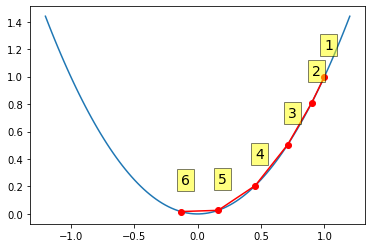

In [99]:
#Gradient descent with momentum
alpha = 0.95
x0 = 1
xs = gd_momentum(x0, grad, alpha, beta=0.9, max_iter=5)

xp = np.linspace(-1.2, 1.2, 100)
plt.figure()
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')

for i, (x,y) in enumerate(zip(xs, f(xs)), 1):
    plt.text(x, y+0.2, i, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
plt.show()

# Momentum + RMSProp

In [100]:
#Definition of function in 2D

def f2(x):
    return x[0]**2 + 100*x[1]**2

def grad2(x):
    return np.array([2*x[0], 200*x[1]])
  

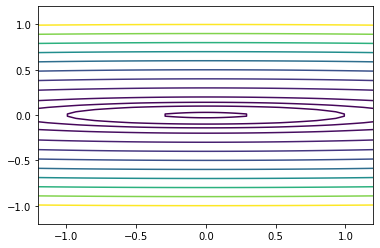

In [101]:
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X,Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = X**2 + 100*Y**2
plt.figure()
c = plt.contour(X, Y, Z, levels)
plt.show()

In [102]:
#Classic gradient descent
def gd2(x, grad, alpha, max_iter=10):
    xs = np.zeros((1+max_iter,x.shape[0]))
    xs[0,:] = x

    for i in range(max_iter):
        x = x - alpha*grad(x)
        xs[i+1,:] = x
    return xs

In [103]:
#Gradient descent with momentum
def gd2_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros((1+max_iter, x.shape[0]))
    xs[0,:] = x

    v = 0

    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1 + beta**(i+1))
        x = x - alpha*vc
        xs[i+1,:] = x
    return xs

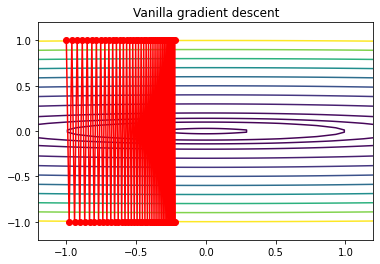

In [104]:
#Gradient descent with large step size
alpha = 0.01
x0 = np.array([-1, 1])
xs = gd2(x0, grad2, alpha, max_iter=75)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
plt.figure()
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:,0],xs[:,1], 'o-', c='red')
plt.title('Vanilla gradient descent')
plt.show()

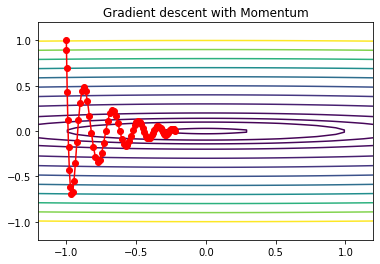

In [105]:
#Gradient descent with momentum
alpha = 0.01
x0 = np.array([-1, 1])
xs = gd2_momentum(x0, grad2, alpha, beta=0.9, max_iter=75)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
plt.figure()
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:,0],xs[:,1], 'o-', c='red')
plt.title('Gradient descent with Momentum')
plt.show()

In [110]:
#RMSProp
def gd2_rmsprop(x, grad, alpha, beta=0.9, eps=1e-8, max_iter=10):
    xs = np.zeros((1+max_iter, x.shape[0]))
    xs[0,:] = x
    v = 0

    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)**2
        x = x - alpha*grad(x)/(eps + np.sqrt(v))
        xs[i+1,:] = x
    return xs

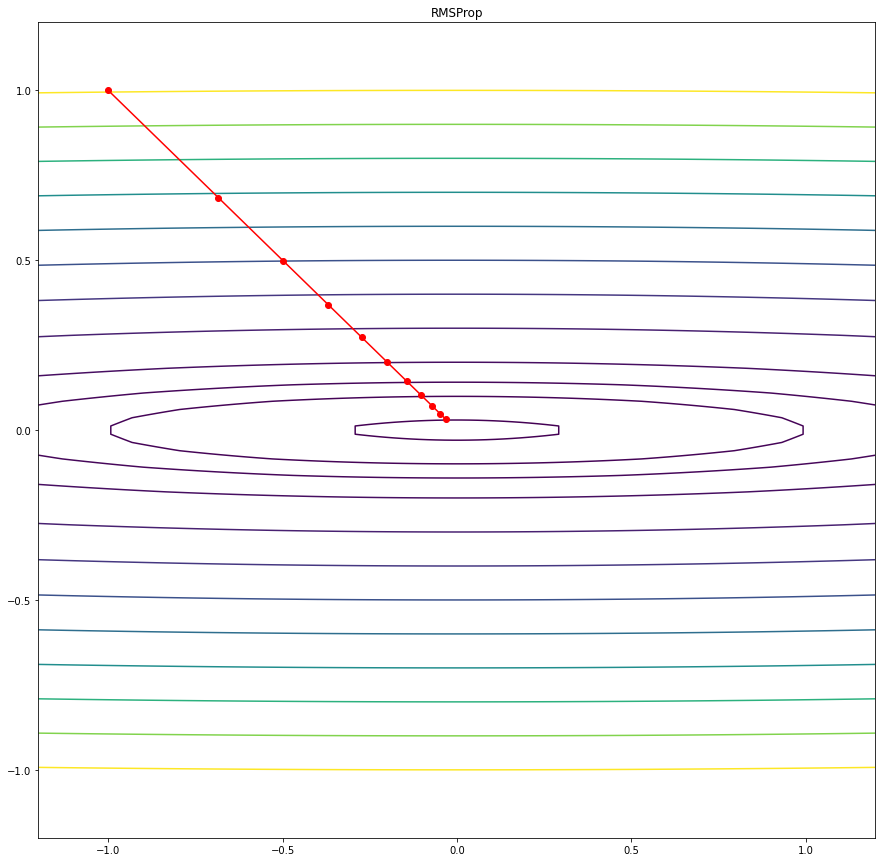

In [113]:
alpha = 0.1
x0 = np.array([-1, 1])
xs = gd2_rmsprop(x0, grad2, alpha, beta=0.9, max_iter=10)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
plt.figure(figsize=(15,15))
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:,0],xs[:,1], 'o-', c='red')
plt.title('RMSProp')
plt.show()

# ADAM

In [108]:
def gd2_adam(x, grad, alpha, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=10):
    xs = np.zeros((1+max_iter,x.shape[0]))
    xs[0,:] = x
    m=0
    v=0
    for i in range(max_iter):
        m = beta1*m + (1-beta1)*grad(x)
        v = beta2*v + (1-beta2)*grad(x)**2
        mc = m/(1 + beta1**(i+1))
        vc = v/(1 + beta2**(i+1))
        x = x - alpha*m/(eps + np.sqrt(vc))
        xs[i+1,:]=x
    return xs

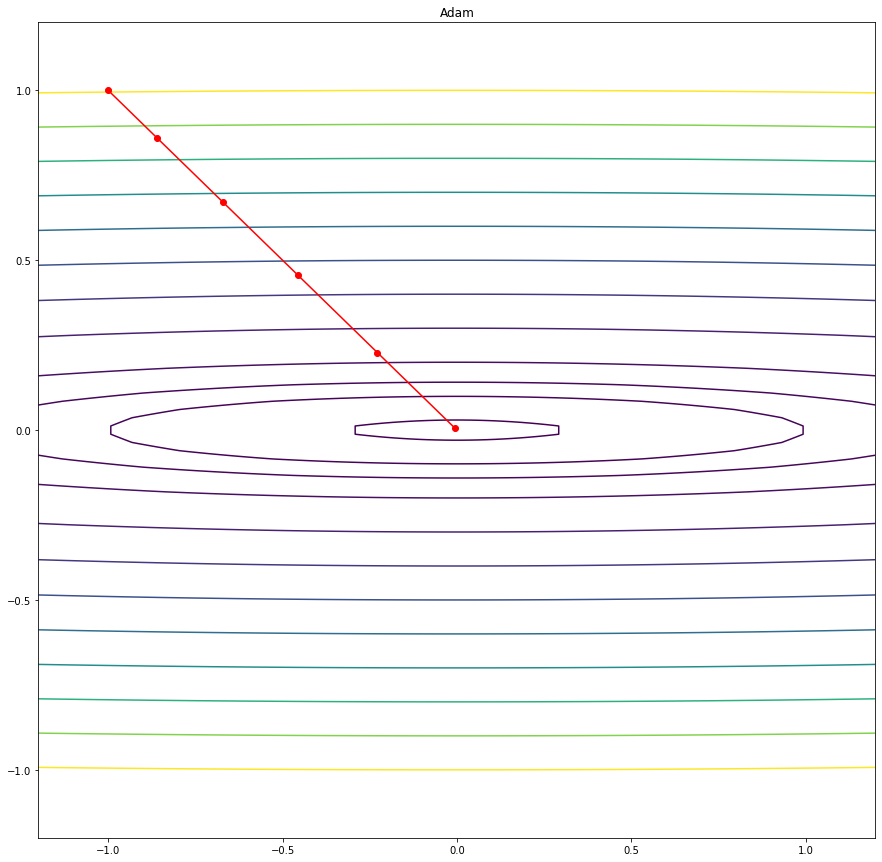

In [114]:
alpha = 0.1
x0 = np.array([-1, 1])
xs = gd2_adam(x0, grad2, alpha, beta1=0.9, beta2=0.99, max_iter=5)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
plt.figure(figsize=(15,15))
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:,0],xs[:,1], 'o-', c='red')
plt.title('Adam')
plt.show()